***

# Fonctions d'affichage

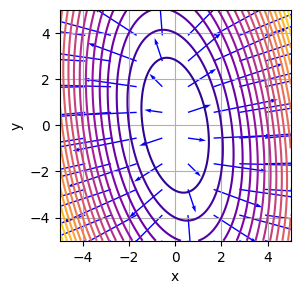

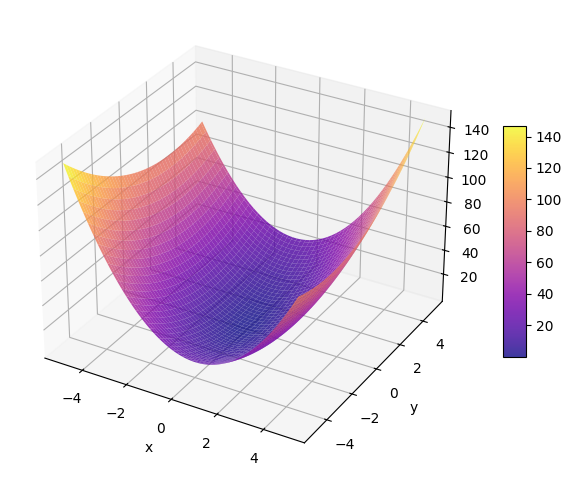

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def afficher_lignes_niveau(f, grad_f=None,arrow_factor=1,liste_etapes=None):
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    x_mat, y_mat = np.meshgrid(x, y)
    f_vect = np.vectorize(f)
    z_mat = f_vect(x_mat, y_mat)    
    plt.figure(figsize=(3, 3))
    plt.contour(x_mat, y_mat, z_mat, levels=20, cmap="plasma")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.axis("square")
    if grad_f:
        x_grad = np.linspace(-5, 5, 10)
        y_grad = np.linspace(-5, 5, 10)
        x_grad_mat, y_grad_mat = np.meshgrid(x_grad, y_grad)
        grad_f_vect = np.vectorize(grad_f)
        u_mat, v_mat = grad_f_vect(x_grad_mat, y_grad_mat)
        plt.quiver(x_grad_mat, y_grad_mat, arrow_factor*u_mat, arrow_factor*v_mat, color="blue", angles="xy", scale_units="xy", scale=5)    
    if liste_etapes:
        x_points, y_points = zip(*liste_etapes)
        plt.plot(x_points, y_points, 'g-',linewidth=3)
    plt.show()


def afficher_3D(f,liste_etapes=None):
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    x_mat, y_mat = np.meshgrid(x, y)
    f_vect = np.vectorize(f)
    z_mat = f_vect(x_mat, y_mat)        
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(x_mat, y_mat, z_mat, cmap="plasma", edgecolor='none', alpha=0.8)
    if liste_etapes:
        x_points, y_points = zip(*liste_etapes)
        z_points = [f(x, y) for x, y in liste_etapes]
        ax.plot(x_points, y_points, z_points, 'g-',linewidth=3) 
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
    plt.show()

f = lambda x, y: 4*x**2 + x*y + y**2
grad_f = lambda x,y: (8*x+y,x+2*y)
afficher_lignes_niveau(f,grad_f,1)
afficher_3D(f)
